## Exploratory Data Analysis 

Below we've organized our data by renaming the our columns (to make the x and y variables identifiable). We'll explore our dataset and will plot general information about our dataset. 


We'll conduct univariate analysis to individually explore each variable, and will conduct bivariate analyisis characteristics to explore the relationships between variables. Our goal is to better understand our x and y variables, the sample distribution, and figure out which relationships are worth analyzing in more detail. 

In [3]:
#Importing all necessary python packages relevant to exploration/analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Loading Energy Efficiency dataframe
df = pd.read_excel('../data/raw/energy_efficiency_file.xlsx')

In [5]:
#Displaying first 5 rows of data

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We will be renaming the X and y variables to understand what our variables represent. 

In [6]:
#Renaming colummn names for clarity on what 'X' and 'Y' values represent
#Printing first five rows of dataframe

df.rename(columns= {'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4':'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace = True)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We've renamed the following X variables: Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, and Glazing Area Distribution. We've also renamed the following y variables: Heating Load and Cooling Load. 

In [7]:
#Exploring the type of data we are working with 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Glazing Area, Heating Load, and Cooling Load are represented using floats.
However, we have two discrete variables (Orientation and Heating Load) which are comprised of integer values. 

In [8]:
#Checking Unique Values in Overall Height
df["Overall Height"].unique()

array([7. , 3.5])

Upon further analysis, there are only two unique values in the Overall Height column (3.5 and 7). Thus, we will treat these numbers as categories.  

In [9]:
#Summary Statistics

df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


The describe() function allows us to look at the descriptive statistics for all of our columns (e.g.: mean, standard deviation). This dataframe is comprised of values that greatly range in size. For example, Glazing Area has a min value of 0.0 and a max value of 0.4, while Surface Area has a min value of 245.0 and max value of 808.5. Our average Heating Load across our data amounts to approx 22.31. 

In [10]:
#Dropping the Cooling Load (Y2) column, as the only Y variable we'll only be focusing on is Heating Load (Y1) in this analysis. 

df.drop('Cooling Load', axis = 1, inplace = True)
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In this analysis we are primarily interested in looking at the relationship between all building features against one aspect of energy efficiency. Thus, we dropped Cooling Load from our analysis to focus on analyzing how building features relate to Heating Load. We will now begin the process of conducting univariate and bivariate analysis. 

## Univariate Analysis

 We will continue to analyze our dataset by creating a histogram to observe the distributions of our samples and boxplots to check for outliers. Additionally, we'll use scatterplots, kernel density plots, and the correlation matrix to see how building features (our independent variables) relate to Heating Load (target variable). 

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

<Axes: xlabel='Glazing Area Distribution', ylabel='Count'>

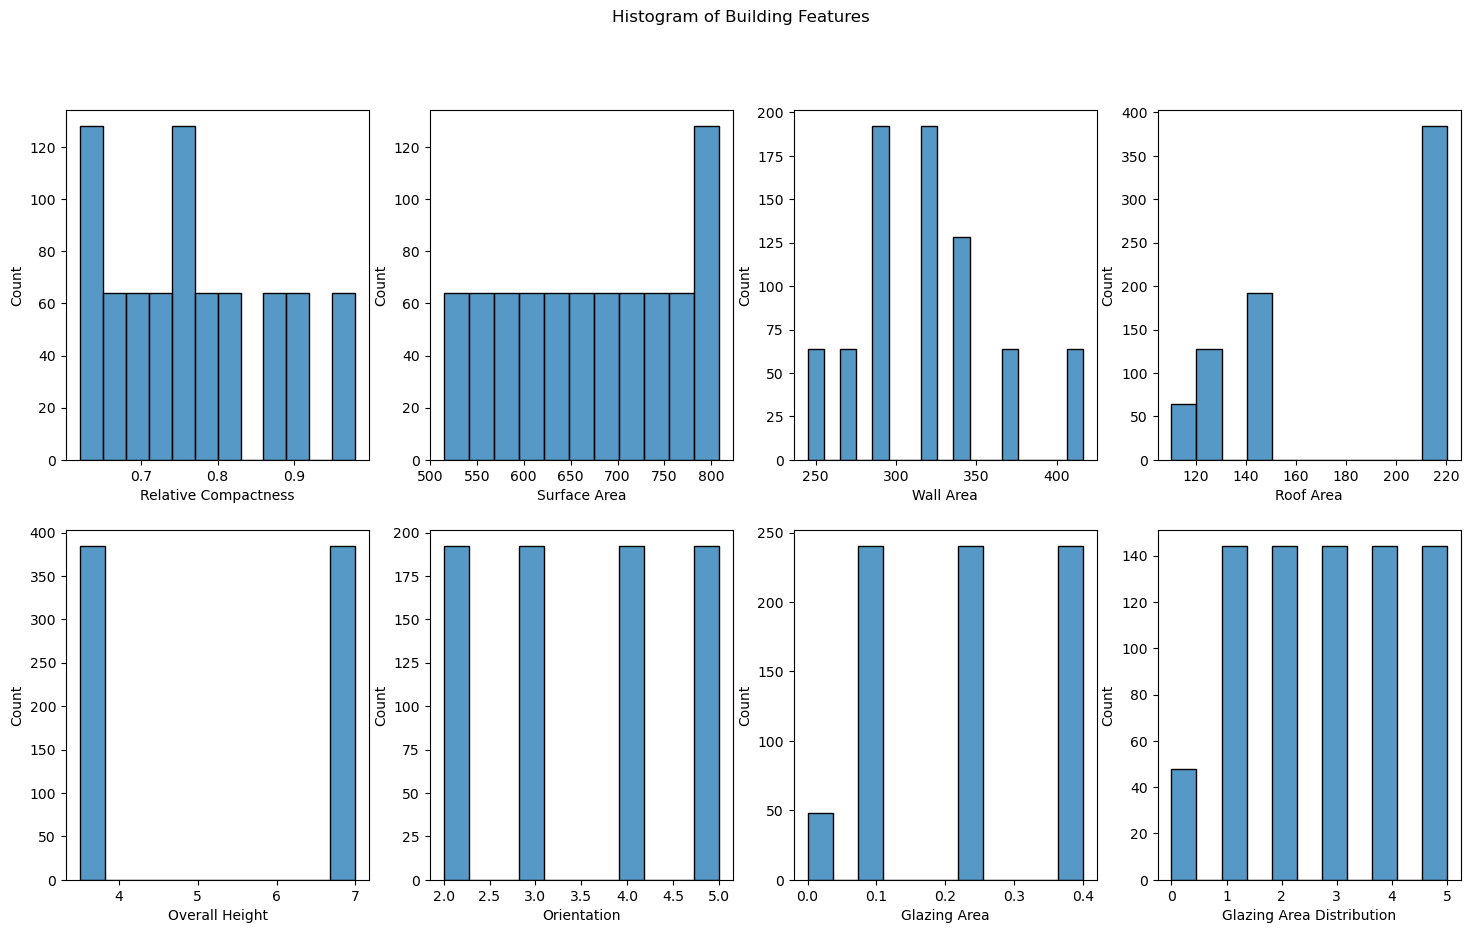

In [11]:
#Creating Histogram of all variables

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

fig.suptitle('Histogram of Building Features')

sns.histplot(ax=axes[0, 0], data=df, x='Relative Compactness')
sns.histplot(ax=axes[0, 1], data=df, x='Surface Area')
sns.histplot(ax=axes[0, 2], data=df, x='Wall Area')
sns.histplot(ax=axes[0, 3], data = df, x ='Roof Area')
sns.histplot(ax=axes[1, 0], data = df, x = 'Overall Height')
sns.histplot(ax=axes[1, 1], data = df, x = 'Orientation')
sns.histplot(ax=axes[1, 2], data = df, x = 'Glazing Area')
sns.histplot(ax=axes[1, 3], data = df, x = 'Glazing Area Distribution')

The histograms above display the frequencies across eight different building features. With the exception of Wall Area and Roof Area, the distribution of our histograms is relatively uniform.

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Heating Load')

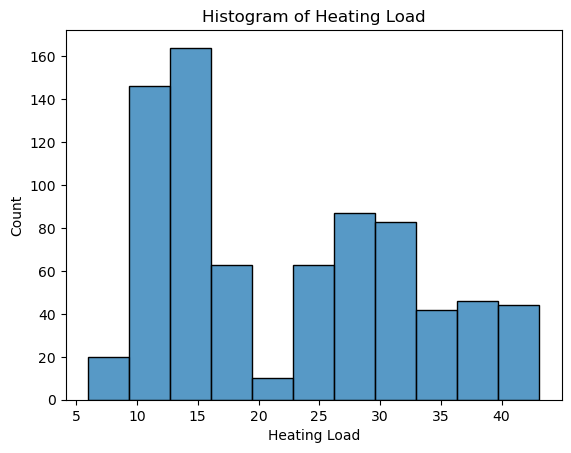

In [12]:
#Histogram of Heating Load (Y variable, our target)
sns.histplot(data = df, x = 'Heating Load')
plt.title('Histogram of Heating Load')


The histogram above displays the count of buildings with the associated Heating Load amount. According to this chart, there are a little over three hundred buildings with a Heating Load ranging between ten and fifteen. 

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Glazing Area Distribution'>

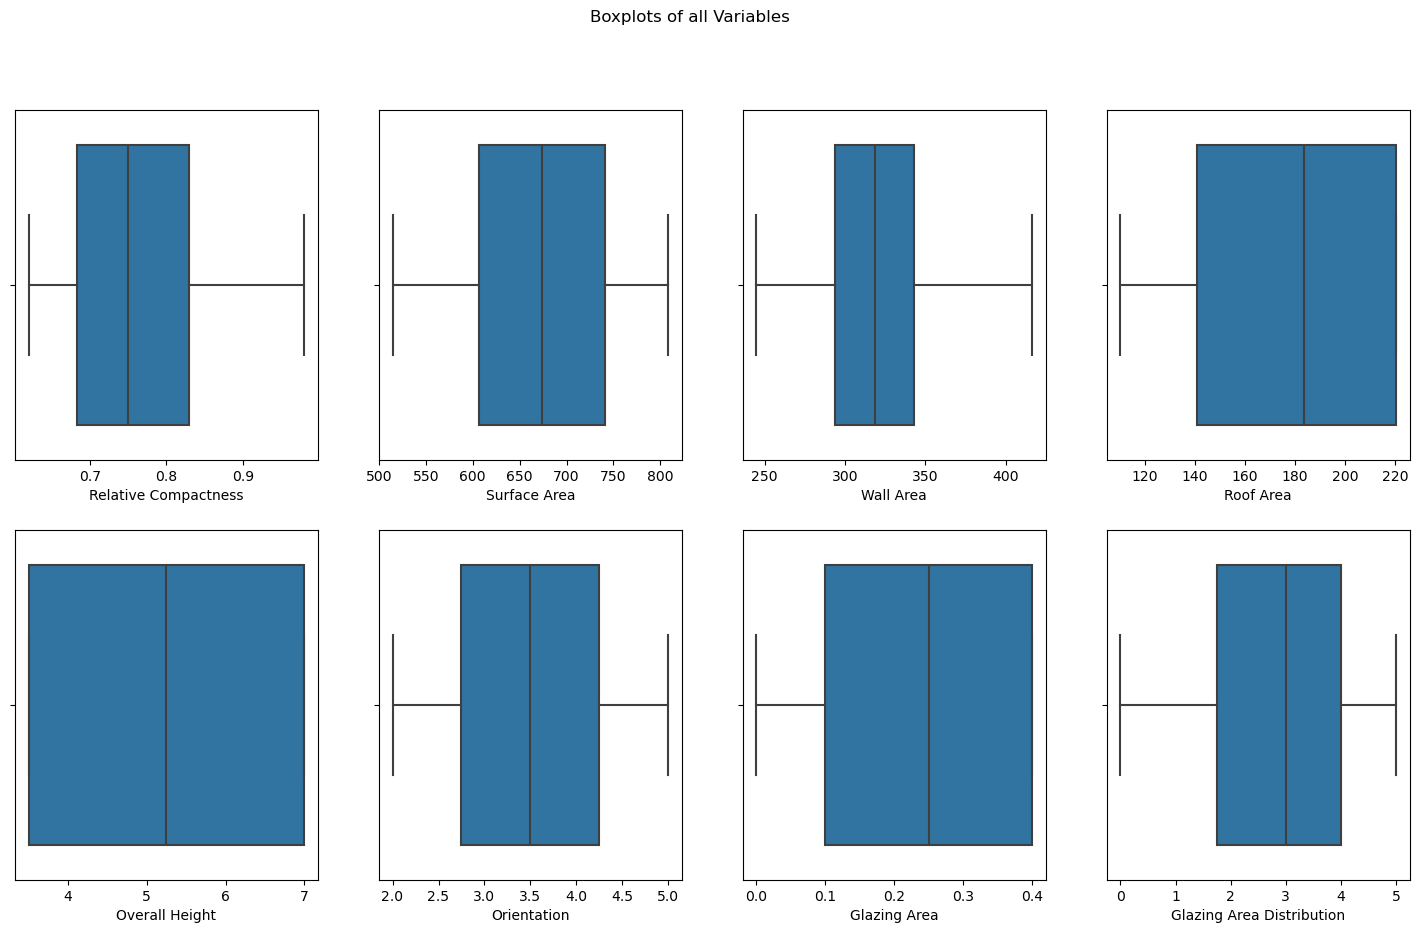

In [13]:
#Boxplot of all building features (X variables)

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

fig.suptitle('Boxplots of all Variables')

sns.boxplot(ax=axes[0, 0], data=df, x='Relative Compactness')
sns.boxplot(ax=axes[0, 1], data=df, x='Surface Area')
sns.boxplot(ax=axes[0, 2], data=df, x='Wall Area')
sns.boxplot(ax=axes[0, 3], data = df, x ='Roof Area')
sns.boxplot(ax=axes[1, 0], data = df, x = 'Overall Height')
sns.boxplot(ax=axes[1, 1], data = df, x = 'Orientation')
sns.boxplot(ax=axes[1, 2], data = df, x = 'Glazing Area')
sns.boxplot(ax=axes[1, 3], data = df, x = 'Glazing Area Distribution')

There are no outliers present across all building features.

c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heating Load'>

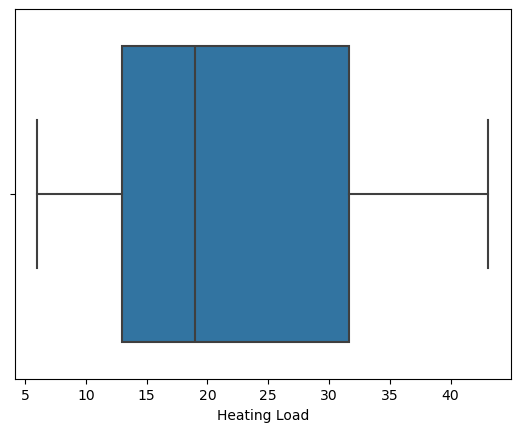

In [14]:
#Boxplot of Heating Load (Y variable, our target)
sns.boxplot(data = df, x = 'Heating Load')

There are no outliers found in Heating Load distribution. 

## Bivariate Analysis

We'll be conducting bivariate analysis to visualize the relationship between multiple variables. 

In [17]:
#Seaborn pairplot to plot multiple bivariate distributions in dataset
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)


c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uma\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

The pairgrid above displays all possible relationships between each of the variables (both X and y) in the dataframe. We are primarily interested in looking at the relationship between each X variable across the y variable (Heating Load). The scatterplots above don't provide us with clear information about the relationship of the X and y variables, since some of our X variables (such as Orientation) can be classified as categorical data. The kernel density plot can give us a better visual to analyze the relationship between building features and Heating Load, by visually displaying where points on a graph are densely populated. By looking at the kernel density plot, we can see that there is probably a positive correlation between Relative Compactness and Heating Load, Overall Height and Heating Load, as well as a negative correlation between Surface Area and Heating Load, and Roof Area and Heating Load. We will explore the relationship between these variables further using a correlation matrix. 

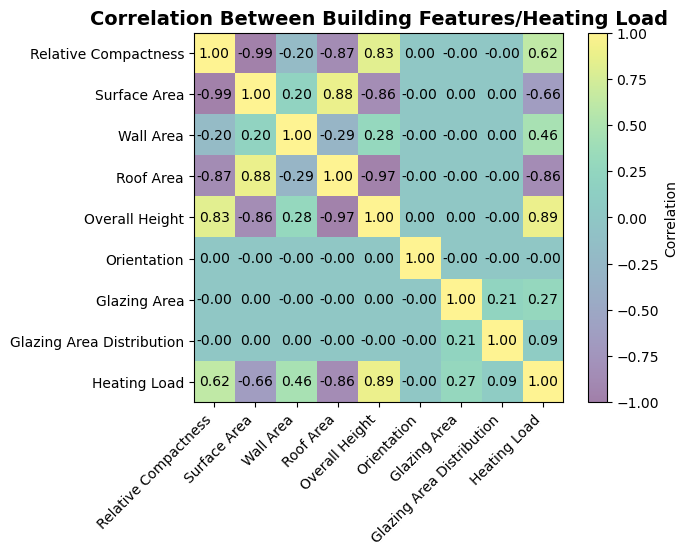

In [16]:
#Creating heatmap in matplotlib to show the correlation between variables 
#We are mainly interested in the correlation between X variables and y (Heating Load)
cor_matrix = df.corr()
cor_matrix

plt.imshow(cor_matrix, cmap='viridis', vmin=-1, vmax=1, alpha = 0.5)
plt.colorbar(label='Correlation')

plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns, rotation = 45, ha = 'right')
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)

for i in range(len(cor_matrix)):
    for j in range(len(cor_matrix)):
        plt.text(j, i, f"{cor_matrix.iloc[i, j]:.2f}", va='center', ha='center', color='black')

plt.title("Correlation Between Building Features/Heating Load", fontweight = "bold", fontsize = 14)

plt.show()

The visual above displays a heatmap containing the correlation across multiple building features (X variables) and Heating Load (y variable). The numbers listed (-1 to 1) represents correlation where: 1 represents a very strong positive correlation (purple), 0 represents no correlation (bluegreen), and -1 represents a strong negative correlation (yellow). 

Although the graph generally displays the varying dependencies of building features, we are interested in the correlation of all building features across Heating Load. Orientation (correlation 0.0) appears to possess no correlation to Heating Load. Glazing Area Distribution (correlation 0.09) and Glazing Area (correlation 0.27) possess almost no correlation to Heating Load. Wall Area (correlation 0.46) possesses some correlation to Heating Load.

However, there are some build features worth exploring in further details. There is a moderate positive correlation between Relative Compactness (0.62) and Heating Load. There is a very strong positive correlation between Overall Height of building (0.89) and Heating Load. Additionally, the graph reveals a moderate negative correlation between Surface Area (correlation -0.66) and Heating Load. Lastly, the visual reveals a strong negative correlation between Roof Area (correlation -0.86) and Heating Load. 


## Exploratory Data Analysis Recap








The analysis focused on examining the relationship between different building features across Heating Load, excluding Cooling Load from analysis. We analyzed  individual variables and variables pairs, utilizing histograms, boxplots, scatterplots, kernel density plots, and correlation matrix. The histograms showed generally uniform distributions across building features, with exceptions in Wall Area and Roof Area. No outliers were identified in the building features or Heating Load. Our kernel density plots hinted at potential correlations between Relative Compactness, Overall Height, Surface Area, Roof Area, and Heating Load. Further investigation using the correlation matrix confirmed our observations. Relative Compactness and Overall Height exhibited moderate to very strong positive correlations with Heating Load, while Surface Area and Roof Area showed moderate to strong negative correlations with Heating Load. Some features, like Orientation, Glazing Area, and Glazing Area Distribution, demonstrated little or no correlation with Heating Load, emphasizing the need for a focused exploration of certain building features.





